# Vehicle-Price-Predictor On CarDekho

## Introduction
**The objective of this kernel is to use an example of vehicles and help reach a good r2 score using basic regression model upon various Data.viz techniques.**

**Hence,for instance, we get data from the car website CarDekho.com, filled with information on a wide variety of cars, including their selling price and present price. We realize that we can use this data to make sure we get a good deal on a new car. In particular, we can figure out exactly how much one should pay for a specific type of car. 
Therefore, it is a prediction problem.**




## About the dataset
**This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset is as follows:**
* Car_Name - This column should be filled with the name of the car.
* Year -This column should be filled with the year in which the car was bought.
* Selling_Price - This column should be filled with the price the owner wants to sell the car at.
* Present_Price - This is the current ex-showroom price of the car.
* Kms_Driven - This is the distance completed by the car in km.
* Fuel_Type - Fuel type of the car.
* Seller_Type - Defines whether the seller is a dealer or an individual.
* Transmission - Defines whether the car is manual or automatic.
* Owner - Defines the number of owners the car has previously had.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




## Fetching the Data


In [2]:
#load dataset and assign it to a variable
vehicles=pd.read_csv("C:/Users/Parth Mehta/Downloads/ibm machine learning/Supervised Learning - Regression/Data/car data.csv")

## Check out the Data - Initial Exploration Dtrategy
**We will run some exploratory analysis on our cardekho dataset now that it is loaded in the vehicles variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features.
We will also try to determine visually how all the features are related to the selling price.**

In [3]:
#use the 'head' method to show the first five rows of the table as well as their names. 
vehicles.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Looking at the above 5 rows of data we need to develop an understanding of every column to efficiently continue exploring the dataset further.
We need to have a clear understanding of every feature defined in the data-set and what it is trying to convey!**

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Above is a concise summary of our dataframe printing columns' data-type,index data-type, shape of the dataset (301,9) and number of non-null values !**

In [5]:
vehicles.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Looking at the result of the above query it seems clear we have no missing/null values in our dataset!**

In [6]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!**

## Exploratory Data Analysis(EDA)
Let's create some simple plots to check out the data!

**Visualizing the categorical data :**
## 1. Owner Type
Let's examine the selling price based on the type of owner

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

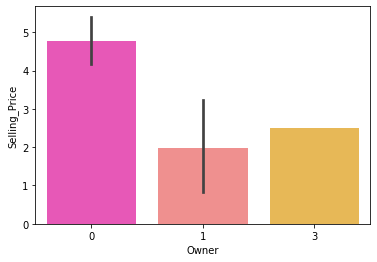

In [7]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

**It seems that the vehicles belonging to owner 0 have the highest selling price**

## 2. Transmission Type
Let's examine the selling price for manual and automatic vehicles! 

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

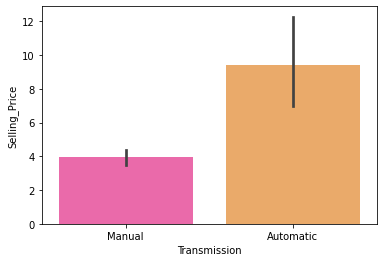

In [8]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

**We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.**

## 3. Fuel Type
Let's examine the selling price based on different types of engine fuel!

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

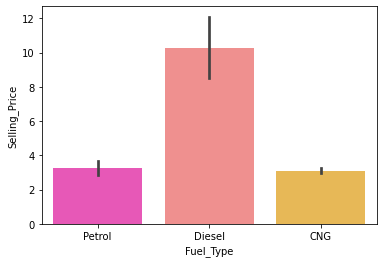

In [9]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

**Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles**

## 4. Seller Type
Let's get an idea of the selling price for a vehicle sold by a Dealer vs Individual!

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

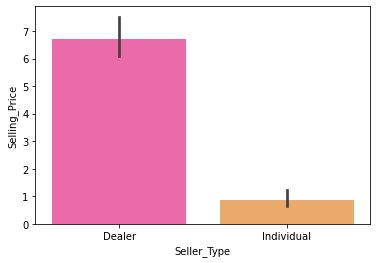

In [10]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

**Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !**

**Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :**
## 1. Kms Driven

<Figure size 720x720 with 0 Axes>

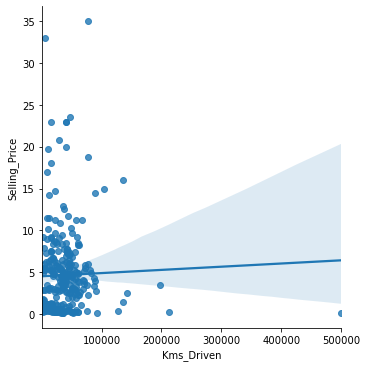

In [11]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

**The selling price is found to be higher for vehicles with less kms covered under the belt!**

## 2. Present Price

<Figure size 720x720 with 0 Axes>

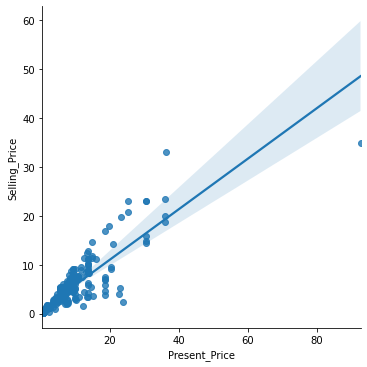

In [12]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

**Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.**

## 3. Vehicle Age

In [13]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']

#check out the newly added column
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Selling_Price'>

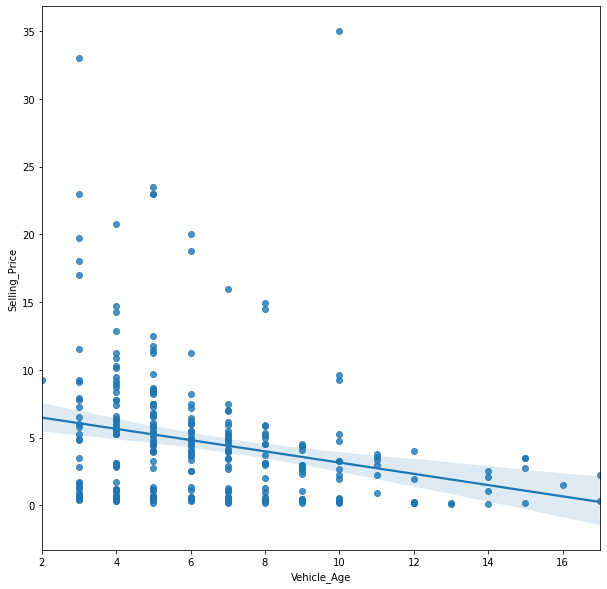

In [14]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

**It seems the selling price decreases overall for older/ageing vehicles!**

## Feature Engineering
We shall convert categorical features to numeric type!

In [15]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


* Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
* Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
* Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer  and '0' Seller_Type_Individual.


## Understanding and Visualizing Correlations amongst the features

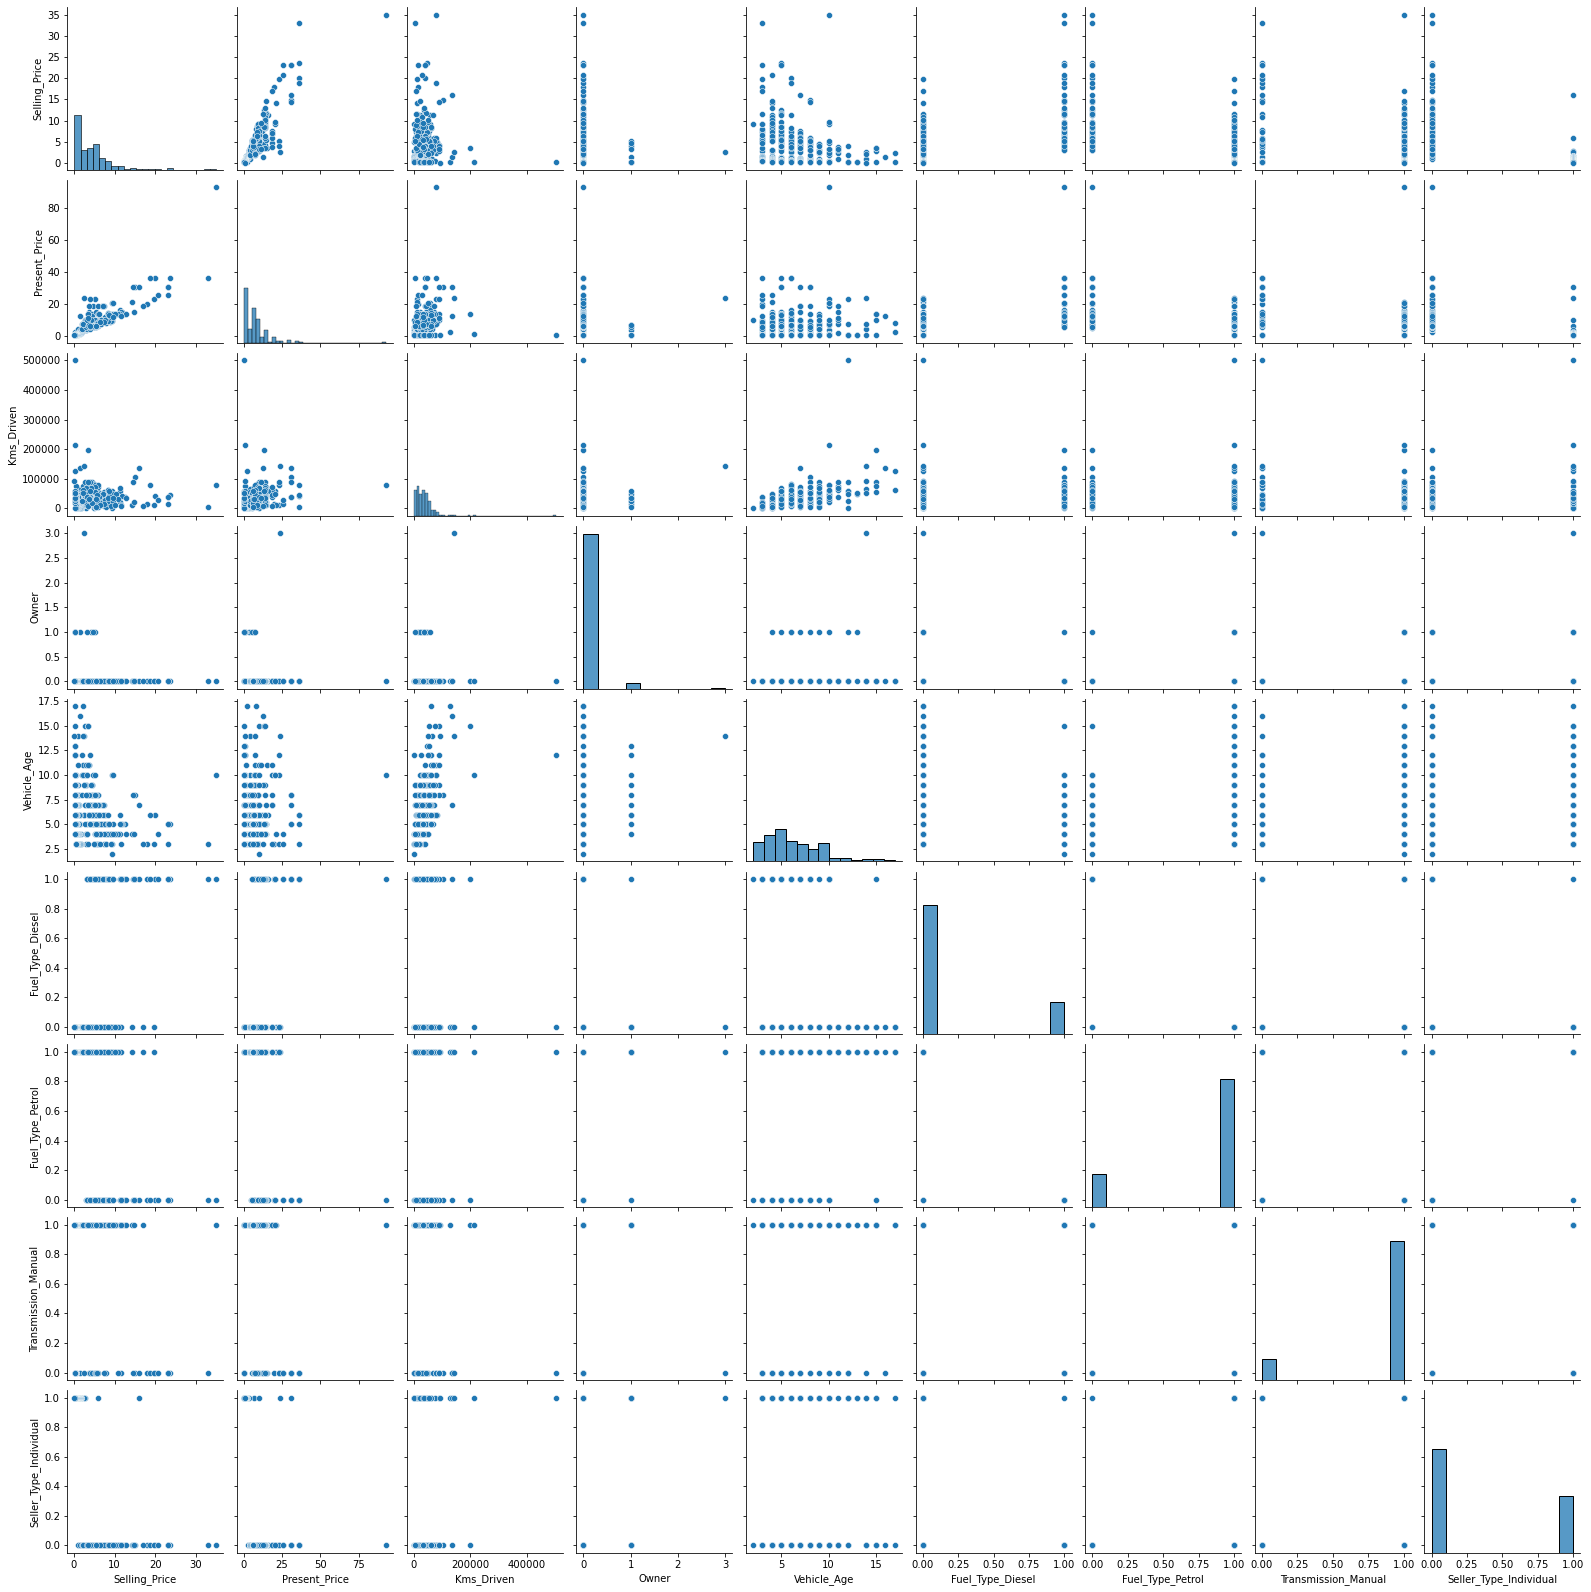

In [16]:
sns.pairplot(vehicles)

* The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features. 
* Selling price seems to be considerably correlated with the Present Price feature.

## Correlation HeatMap

<AxesSubplot:>

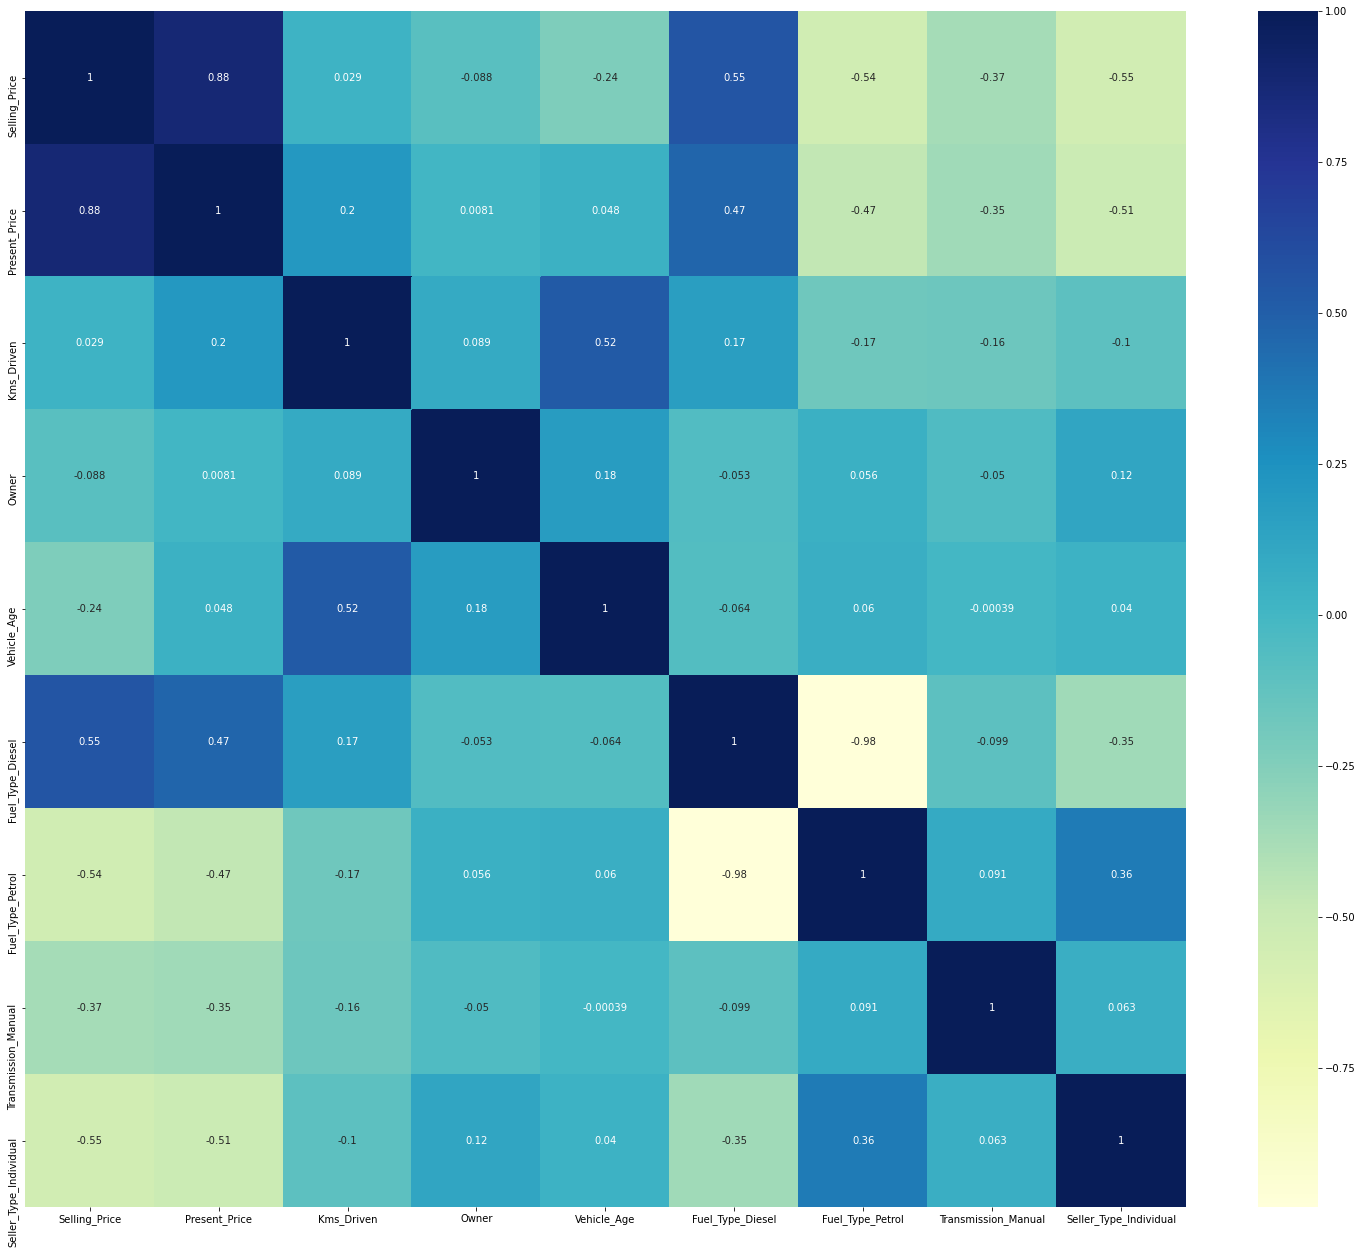

In [17]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")


## Checking Distribution of target variable

<AxesSubplot:>

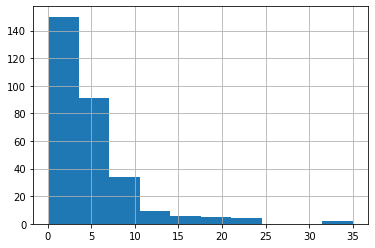

In [18]:
vehicles.Selling_Price.hist()

In [19]:
from scipy.stats.mstats import normaltest
normaltest(vehicles.Selling_Price.values)

NormaltestResult(statistic=181.57710837672042, pvalue=3.724190569354686e-40)

**p-value extremely low. Our y variable we've been dealing with this whole time was not normally distributed!**

In [20]:
from scipy.stats import boxcox
bc_result=boxcox(vehicles.Selling_Price)
boxcox_selling_price = bc_result[0]
lam = bc_result[1]

<AxesSubplot:>

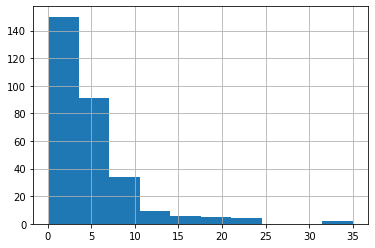

In [21]:
vehicles.Selling_Price.hist()

<AxesSubplot:>

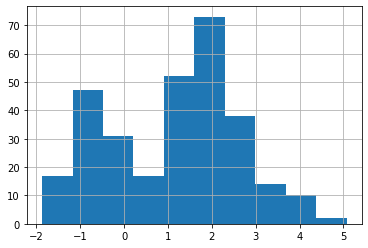

In [22]:
vehicles['Selling_Price']=boxcox_selling_price
vehicles.Selling_Price.hist()

In [23]:
normaltest(vehicles.Selling_Price.values)

NormaltestResult(statistic=13.763069111420373, pvalue=0.0010265675108085965)

**We get a significantly better p - value using boxcox and a better distributed target variable**

## Seperating the independant and dependant features

In [24]:
Y=vehicles[['Selling_Price']]
Y.head()

,Selling_Price
0,1.358279
1,1.811942
2,2.402963
3,1.158202
4,1.768992


In [25]:
X=vehicles.drop(['Selling_Price','Car_Name'],axis=1)
X.head()

,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,5.59,27000,0,6,0,1,1,0
1,9.54,43000,0,7,1,0,1,0
2,9.85,6900,0,3,0,1,1,0
3,4.15,5200,0,9,0,1,1,0
4,6.87,42450,0,6,1,0,1,0


## Fitting and comparing 3 different regression models 

**1. Linear Regression**
**2. RIdge Regression**
**3. Lasso regression**

### Train test Split The data 

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

### Fitting a simple Linear regression model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

X_train_S = s.fit_transform(X_train)

linearRegression = LinearRegression().fit(X_train_S, Y_train)

X_test_S=s.transform(X_test)


In [28]:
from sklearn.metrics import r2_score
y_pred=linearRegression.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [30]:
rmse(Y_test,y_pred)

749.0111555107953

**This model has a high rmse error of 749.01**

### Adding Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures
degree = 4
pf = PolynomialFeatures(degree)
X_poly=pf.fit_transform(X)



X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.3,random_state=42)



s=StandardScaler()

X_train_S = s.fit_transform(X_train)

lr=LinearRegression()

lr.fit(X_train_S,Y_train)

X_test_S=s.transform(X_test)


y_pred=lr.predict(X_test_S)



In [32]:
rmse(Y_test,y_pred)

6.985897786212869

**This helped bring down the rmse error quite a bit.**

## Trying regularization now !

In [34]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_S, Y_train)

ridgeCV_rmse = rmse(Y_test, ridgeCV.predict(X_test_S))

print(ridgeCV.alpha_, ridgeCV_rmse)

1.0 0.23240185841826413


**Ridge regression really helped us bring the rmse to a much lower value** 

In [35]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_S, Y_train)

lassoCV_rmse = rmse(Y_test, lassoCV.predict(X_test_S))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 0.20890473729355502


**Whoa Lasso really outdid it with a rmse of just 0.209**

# Conclusions
1. Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly   proportional to each other.
2. Resale value of Automatic vehicle is more than that of a Manual vehicle.
3. Car age is effecting negatively as the Selling Price decreases for an older car.
4. Resale value of cars with Fuel type Diesel is higher.

**Lasso Regression (lamba=0.0005) performs better than Ridge Regression (lambda=1.0) which inturn performs better than a plain ol Simple linear Regression model**
**Adding Too many polynomial features to this model was a mistake which was corrected by reguralization**


# Suggestions
**My Suggestions to you to further increase the accuracy of the prediction is to find more features for the same cars from any cars data like their horsepower, Max-Rpm , Torque , Turning Radius , How many seater car it is , Colour of the car etc . Adding these features and then creating polynomial features and using regularization might increase the accuracy of prediction even more**